In [2]:
import pandas as pd
import os, sys, shutil
sys.path.append('/Users/oisin-brogan/Code/similar_images')
from generate_hashes import generate_hashes
from process_results import load_dictionary
from read_exif import read_exif
import rules

In [3]:
%matplotlib inline

In [4]:
with open('/Users/oisin-brogan/Downloads/moderated_photos/temp.txt') as f:
    times = f.readlines()
    times = [float(time.strip()) for time in times]

In [5]:
sorted(times)

[4.38333333333,
 5.71666666667,
 7.31666666667,
 7.38333333333,
 7.76666666667,
 7.88333333333,
 7.95,
 8.0,
 8.33333333333,
 8.53333333333,
 8.68333333333,
 9.0,
 9.41666666667,
 9.7,
 9.9,
 10.2,
 11.1833333333,
 11.6333333333,
 11.65,
 11.6833333333,
 12.9333333333,
 13.75,
 14.6166666667,
 14.7166666667,
 15.3333333333,
 17.4,
 18.4166666667,
 18.6,
 18.6833333333,
 18.7666666667,
 19.4333333333,
 21.0,
 22.0,
 22.2,
 22.7166666667,
 22.8666666667,
 23.1833333333,
 23.5,
 24.1833333333,
 24.2833333333,
 24.8166666667,
 24.8166666667,
 24.8166666667,
 25.0,
 25.35,
 25.75,
 28.1,
 29.2666666667,
 29.75,
 31.0833333333,
 31.0833333333,
 31.1166666667,
 31.2333333333,
 32.5,
 33.4833333333,
 34.0,
 34.0,
 35.0,
 35.8333333333,
 37.5333333333,
 37.8,
 39.0,
 39.0666666667,
 39.1,
 39.15,
 40.4833333333,
 41.15,
 41.3166666667,
 42.1166666667,
 43.1833333333,
 43.7666666667,
 45.1833333333,
 46.8,
 49.7666666667,
 50.05,
 50.4166666667,
 52.2,
 53.6166666667,
 56.7166666667,
 58.4166666

In [27]:
step_photos_path = '/Users/oisin-brogan/Downloads/step_photos2/'
c_m_photos_path = '/Users/oisin-brogan/Downloads/moderated_photos/'
suggestions_fldr_name = 'suggestions_15/'

exif_tag = 'datetime'

hashs = ['puzzle', 'phash', 'dhash', 'whash']

In [7]:
step_photos_db = pd.read_csv(step_photos_path + 'db.csv')
c_m_photos_db = pd.read_csv(c_m_photos_path + 'db.csv')

In [8]:
read_exif(exif_tag, step_photos_path, step_photos_path + 'exif_data.txt')

def read_exif_txt(txt_path):
    datetimes = {}
    with open(txt_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('/'):
            key = line.split('//')[1][:-5] #getting just image id
            datetimes[key] = ""
        else:
            datetimes[key] = line.split('value ')[1].strip()
    return datetimes
    
def add_taken_at(db, txt_path):
    df = db.copy()
    dic = read_exif_txt(txt_path)
    series = pd.Series(dic)
    df = df.set_index('image_id')
    df.loc[:, 'taken_at'] = series
    df = df.reset_index()
    
    return df

step_photos_db = add_taken_at(step_photos_db, step_photos_path + 'exif_data.txt')

#Convert time strings to  datetimes
step_photos_db.taken_at = step_photos_db.taken_at.map(rules.convert_exif_to_datetime)
c_m_photos_db.taken_at = c_m_photos_db.taken_at.map(rules.convert_ckpd_to_datetime)

Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 
Failed on 

In [9]:
def parse_label(fldr_path):
    with open(fldr_path + 'label.txt', 'r') as f:
        recipe = f.readline()
        if recipe == 'recipe\n':
            lines = f.readlines()
        else:
            lines = []
    
    lines = [l.strip() for l in lines]
    indexs = [i for i,v in enumerate(lines) if v.startswith('.')]
    indexs.append(len(lines))
    list_of_recipes = [lines[indexs[i]+1:indexs[i+1]] for i in range(len(indexs)-1)]
                       
    return list_of_recipes

c_m_by_user = c_m_photos_db.groupby('user_id')
cm_users = set(c_m_photos_db.user_id)
all_recipes = {}

for user_id in cm_users:
    usr_fldr = c_m_photos_path + 'by_user/' + str(user_id) + '/'
    recipes = parse_label(usr_fldr)
    all_recipes[usr_fldr.split('/')[-2]] = recipes

total_recipes = sum([len(v) for v in all_recipes.values()])

Recipe total times

In [10]:
recipe_times = {}
for user, recipes in all_recipes.items():
    for i, recipe in enumerate(recipes):
        recipe_times[str(user) + ' ' + str(i)] = pd.Series([c_m_photos_db[c_m_photos_db.image_id == recipe[0]].taken_at.values[0],
           c_m_photos_db[c_m_photos_db.image_id == recipe[-1]].taken_at.values[0]]).diff().loc[1]

In [11]:
sorted([(k,v) for k,v in recipe_times.items()], key=lambda x: x[1])

[('6095538 10', Timedelta('0 days 00:00:13')),
 ('5478650 0', Timedelta('0 days 00:00:19')),
 ('6145517 0', Timedelta('0 days 00:00:37')),
 ('6145517 1', Timedelta('0 days 00:01:35')),
 ('6113790 2', Timedelta('0 days 00:02:08')),
 ('2432003 2', Timedelta('0 days 00:02:30')),
 ('5169069 0', Timedelta('0 days 00:02:44')),
 ('2432003 3', Timedelta('0 days 00:03:00')),
 ('3749105 1', Timedelta('0 days 00:03:29')),
 ('6129125 0', Timedelta('0 days 00:03:42')),
 ('2432003 1', Timedelta('0 days 00:04:00')),
 ('6044819 1', Timedelta('0 days 00:04:00')),
 ('2432003 0', Timedelta('0 days 00:04:00')),
 ('6066614 0', Timedelta('0 days 00:05:00')),
 ('5933140 2', Timedelta('0 days 00:05:03')),
 ('5988297 0', Timedelta('0 days 00:05:21')),
 ('5886383 2', Timedelta('0 days 00:05:27')),
 ('5933140 1', Timedelta('0 days 00:07:57')),
 ('5998322 0', Timedelta('0 days 00:08:32')),
 ('3536853 0', Timedelta('0 days 00:09:00')),
 ('5933140 0', Timedelta('0 days 00:09:25')),
 ('6095538 9', Timedelta('0 days 

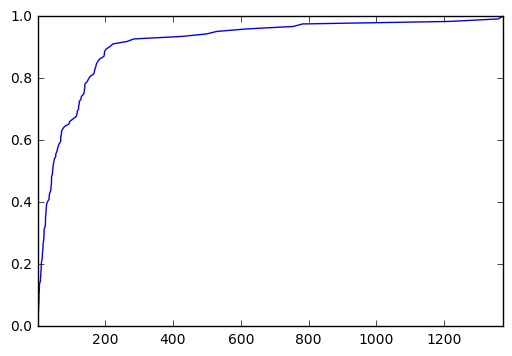

In [13]:
pd.Series([x/124. for x in range(1,125)], index = sorted([x.seconds/60. for x in recipe_times.values()])).plot()

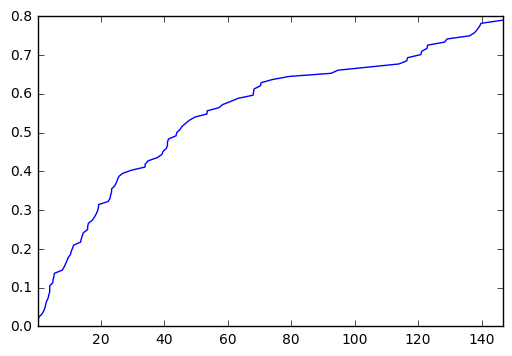

In [14]:
pd.Series([x/124. for x in range(1,125)], index = sorted([x.seconds/60. for x in recipe_times.values()])).loc[:150].plot()

Suggestion times

In [15]:
chrono = c_m_photos_db.copy()
chrono = chrono.set_index('image_id')

In [30]:
suggestion_times = {}

for root, dirs, files in os.walk(c_m_photos_path + suggestions_fldr_name):
    if not dirs: #We're at the bottom
        num = root.split('/')[-1]
        user = root.split('/')[-2]
        #print user
        with open(root+'/image_list.txt') as f:
            images = f.readlines()
        images = [i.strip()[:-4] for i in images]
        times =  chrono.loc[images].taken_at
        suggestion_times[user + ' ' + num] = pd.Series([times.min(), times.max()]).diff().loc[1]

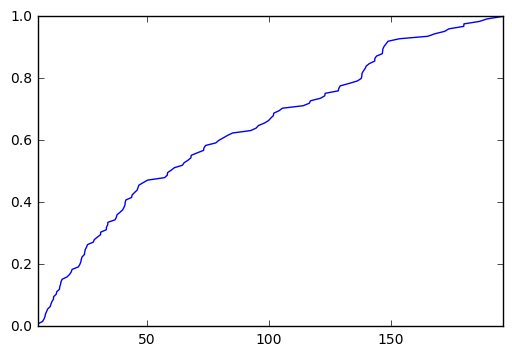

In [32]:
pd.Series([x/125. for x in range(1,126)], index = sorted([x.seconds/60. for x in suggestion_times.values()])).plot()

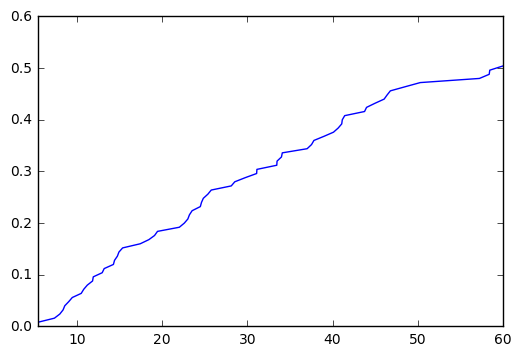

In [33]:
pd.Series([x/125. for x in range(1,126)], index = sorted([x.seconds/60. for x in suggestion_times.values()])).loc[:60].plot()

In [34]:
mistakes = {2551222 :                                             [False],
2949980                     :                         [False],
3307333              :                          [False, True],
3606055               :       [True, True, True, False, True],
3749105               :                  [False, False, True],
3814251               :                   [True, False, True],
4493199               :          [False, False, False, False],
5099165               :                               [False],
5320942               :                               [False],
5478650               :                               [False],
5798062               :          [False, False, False, False],
5830645               :                               [False],
5849867               :                         [False, True],
5886383               :            [True, False, True, False],
5890788                :                       [False, False],
5943465                :                              [False],
5943486                :                              [False],
5958026                :                        [True, False],
5971371                :                              [False],
5989011                :          [False, False, False, True],
5991042                :                              [False],
5996579                :                              [False],
5999868                :                        [False, True],
6042563                :                              [False],
6054932   : [False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False],
6056444    :                             [True, False, False],
6057824    :              [False, False, False, False, False],
6064860     :                                         [False],
6086859     :                            [False, False, True],
6095538 :  [True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True],
6104306  :                                            [False],
6115378  :                                            [False],
6118778  :                                            [False],
6129125  :                                            [False],
6164649  :                                            [False],
6173019   :                              [False, True, False] }

In [35]:
mistake_times = {}
for user, li in mistakes.items():
    for i, b in enumerate(li):
        if not b:
            mistake_times[str(user) + ' ' + str(i) ] = suggestion_times[str(user) + ' ' + str(i) ]

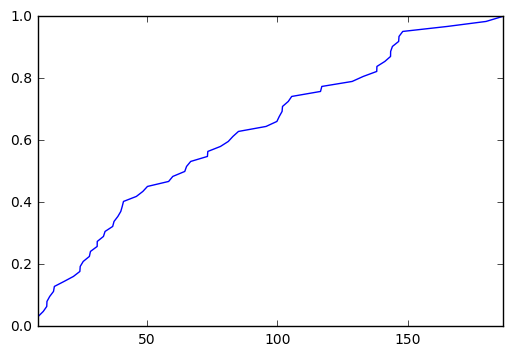

In [36]:
pd.Series([x/62. for x in range(1,63)], index = sorted([x.seconds/60. for x in mistake_times.values()])).plot()

In [37]:
import matplotlib
import matplotlib.pyplot as plt

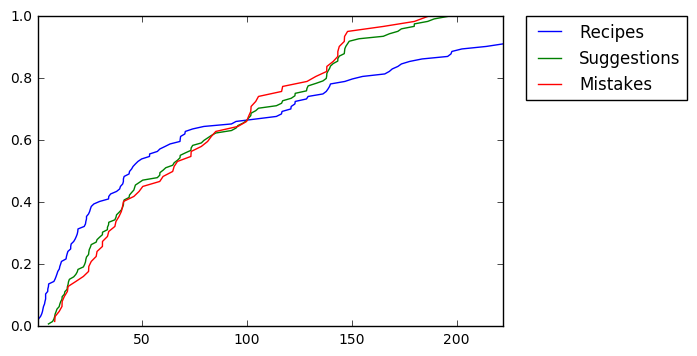

In [39]:
matplotlib.figure.Figure()
pd.Series([x/124. for x in range(1,125)], index = sorted([x.seconds/60. for x in recipe_times.values()])).loc[:250].plot()
pd.Series([x/125. for x in range(1,126)], index = sorted([x.seconds/60. for x in suggestion_times.values()])).loc[:250].plot()
pd.Series([x/62. for x in range(1,63)], index = sorted([x.seconds/60. for x in mistake_times.values()])).loc[:250].plot()
plt.legend(['Recipes', 'Suggestions', 'Mistakes'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

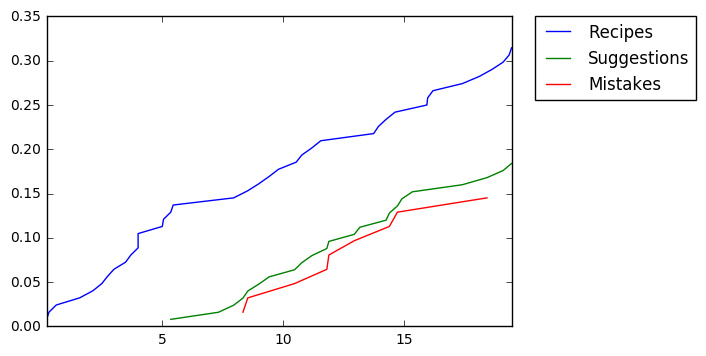

In [41]:
matplotlib.figure.Figure()
pd.Series([x/124. for x in range(1,125)], index = sorted([x.seconds/60. for x in recipe_times.values()])).loc[:20].plot()
pd.Series([x/125. for x in range(1,126)], index = sorted([x.seconds/60. for x in suggestion_times.values()])).loc[:20].plot()
pd.Series([x/62. for x in range(1,63)], index = sorted([x.seconds/60. for x in mistake_times.values()])).loc[:20].plot()
plt.legend(['Recipes', 'Suggestions', 'Mistakes'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Step time  diffs

In [42]:
recipe_diffs = {}
for user, recipes in all_recipes.items():
    for i, recipe in enumerate(recipes):
        times = chrono.loc[recipe].taken_at.sort_values()
        recipe_diffs[str(user) + ' ' + str(i)] = times.diff().dropna()

In [43]:
all_r_diffs = []
for diffs in recipe_diffs.values():
    all_r_diffs += [x/pd.Timedelta(minutes=1) for x in diffs.values]

count     777.000000
mean       23.337688
std       133.951943
min         0.000000
25%         0.133333
50%         1.333333
75%         6.600000
max      2510.383333
dtype: float64


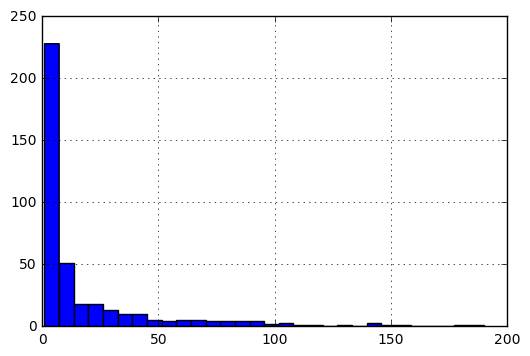

In [44]:
test = pd.Series(all_r_diffs)
print test.describe()
test[(test>1) & (test<200)].hist(bins=30)

In [45]:
suggestion_diffs = {}

for root, dirs, files in os.walk(c_m_photos_path + suggestions_fldr_name):
    if not dirs: #We're at the bottom
        num = root.split('/')[-1]
        user = root.split('/')[-2]
        #print user
        with open(root+'/image_list.txt') as f:
            images = f.readlines()
        images = [i.strip()[:-4] for i in images]
        times =  chrono.loc[images].taken_at.sort_values()
        suggestion_diffs[user + ' ' + num] = times.diff().dropna()

In [46]:
all_s_diffs = []
for diffs in suggestion_diffs.values():
    all_s_diffs += [x/pd.Timedelta(minutes=1) for x in diffs.values]

count    966.000000
mean       9.602709
std       21.655034
min        0.000000
25%        0.133333
50%        1.091667
75%        6.733333
max      144.133333
dtype: float64


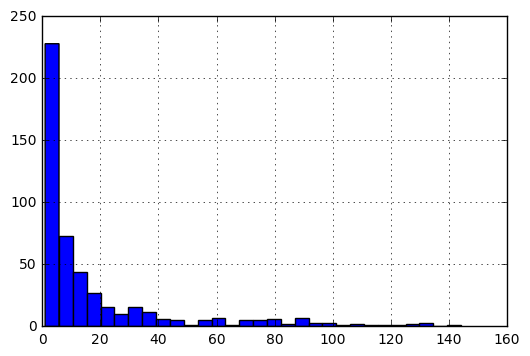

In [47]:
test = pd.Series(all_s_diffs)
print test.describe()
test[(test>1)].hist(bins=30)

In [48]:
mistake_diffs = {}
for user, li in mistakes.items():
    for i, b in enumerate(li):
        if not b:
            mistake_diffs[str(user) + ' ' + str(i) ] = suggestion_diffs[str(user) + ' ' + str(i) ]

In [49]:
all_m_diffs = []
for diffs in mistake_diffs.values():
    all_m_diffs += [x/pd.Timedelta(minutes=1) for x in diffs.values]

count    470.000000
mean       9.762979
std       22.414487
min        0.000000
25%        0.150000
50%        0.958333
75%        6.858333
max      144.133333
dtype: float64


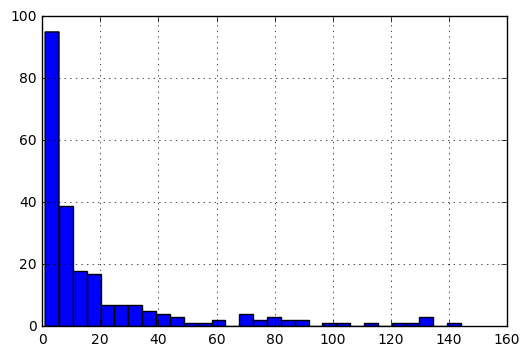

In [50]:
test = pd.Series(all_m_diffs)
print test.describe()
test[(test>1)].hist(bins=30)

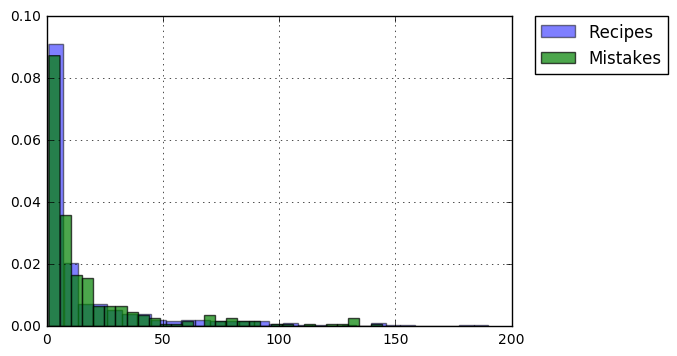

In [51]:
matplotlib.figure.Figure()
test = pd.Series(all_r_diffs)
test[(test>1) & (test<200)].hist(bins=30, alpha = .5, normed = True)
test = pd.Series(all_s_diffs)
#test[(test>1)].hist(bins=30, alpha = .7, normed = True)
test = pd.Series(all_m_diffs)
test[(test>1)].hist(bins=30, alpha = .7, normed = True)
plt.legend(['Recipes', 'Mistakes', 'Mistakes'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [52]:
test = pd.Series(all_r_diffs)
print test[test<120].shape
print test.shape

(754,)
(777,)
